<a href="https://colab.research.google.com/github/FraGoTe/redes-neuronales/blob/master/DeteccionDeDiabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## REDES NEURONALES ARTIFICIALES


##Carga de datos
---

Mostrando lista de archivos:

In [2]:
%%bash
if [ ! -f "diabetes_data.csv" ]; then
    wget www.fragote.com/data/diabetes_data.csv
fi

ls -l 

total 28
-rw-r--r-- 1 root root 23100 Sep 28 21:10 diabetes_data.csv
drwxr-xr-x 1 root root  4096 Nov 21 16:30 sample_data


##Funciones necesarias
---

In [3]:
# Funciones

import numpy as np

from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
from sklearn.externals import joblib

import seaborn as sns
import matplotlib.pyplot as plt

def plot_confusion_matrix(y_true, y_pred,
                          normalize=False,
                          title=None):
    """
    Esta función imprime y traza la matriz de confusión.
     La normalización se puede aplicar configurando `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Matriz de Confusión Normalizada'
        else:
            title = 'Matriz de Confusión sin Normalizar'

    # Calculando la Matriz de Confusion
    cm = confusion_matrix(y_true, y_pred)
    # solo usar las etiquetas que se tienen en la data
    classes = unique_labels(y_true, y_pred)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Matriz de Confusión Normalizada")
    else:
        print('Matriz de Confusión sin Normalizar')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    ax.figure.colorbar(im, ax=ax)
    ax.grid(linewidth=.0)
    # Queremos mostrar todos los puntos...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... etiquetando la lista de datos
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # rotando las etiquedas de los puntos.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    plt.show()
    return ax

def saveFile(object_to_save, scaler_filename):
    joblib.dump(object_to_save, scaler_filename)

def loadFile(scaler_filename):
    return joblib.load(scaler_filename)

def plotHistogram(dataset_final):
    dataset_final.hist(figsize=(20,14), edgecolor="black", bins=40)
    plt.show()

def plotCorrelations(dataset_final):
    fig, ax = plt.subplots(figsize=(10,8))   # size in inches
    g = sns.heatmap(dataset_final.corr(), annot=True, cmap="YlGnBu", ax=ax)
    g.set_yticklabels(g.get_yticklabels(), rotation = 0)
    g.set_xticklabels(g.get_xticklabels(), rotation = 45)
    fig.tight_layout()
    plt.show()


/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)



 ## PARTE I - PREPROCESAMIENTO DE DATOS
---


In [4]:
# Importando librerías
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Importando Datasets
dataset_csv = pd.read_csv('diabetes_data.csv')

# Columnas de la data
print ("\nColumnas del DataSet: ")
print (dataset_csv.columns)

# Describir la data original
print ("\nDataset original:\n", dataset_csv.describe(include='all'))


# Revisamos los tipos de datos de las Columnas
print ("\nTipos de Columnas del Dataset: ")
print(dataset_csv.dtypes)


print ("\nDataset Total: ")
print("\n",dataset_csv.head())

dataset_columns = dataset_csv.columns
dataset_values = dataset_csv.values


Columnas del DataSet: 
Index(['Embarazos', 'Glucosa', 'Presion', 'EspesorPiel', 'Insulina', 'IMC',
       'DiabetesFamiliar', 'Edad', 'PacienteDiabetico'],
      dtype='object')

Dataset original:
         Embarazos     Glucosa  ...        Edad  PacienteDiabetico
count  768.000000  768.000000  ...  768.000000         768.000000
mean     3.845052  120.894531  ...   33.240885           0.348958
std      3.369578   31.972618  ...   11.760232           0.476951
min      0.000000    0.000000  ...   21.000000           0.000000
25%      1.000000   99.000000  ...   24.000000           0.000000
50%      3.000000  117.000000  ...   29.000000           0.000000
75%      6.000000  140.250000  ...   41.000000           1.000000
max     17.000000  199.000000  ...   81.000000           1.000000

[8 rows x 9 columns]

Tipos de Columnas del Dataset: 
Embarazos              int64
Glucosa                int64
Presion                int64
EspesorPiel            int64
Insulina               int64
IMC    

Escalamiento/Normalización de Features (StandardScaler: (x-u)/s): mean = 0 and standard deviation = 1

In [5]:
# Escalamiento/Normalización de Features (StandardScaler: (x-u)/s)
stdScaler = StandardScaler()
dataset_values[:,0:8] = stdScaler.fit_transform(dataset_values[:,0:8])


# Dataset final normalizado
dataset_final = pd.DataFrame(dataset_values,columns=dataset_columns, dtype=np.float64)
print ("\nDataset Final:")
print(dataset_final.describe(include='all'))
print("\n", dataset_final.head())


Dataset Final:
          Embarazos       Glucosa  ...          Edad  PacienteDiabetico
count  7.680000e+02  7.680000e+02  ...  7.680000e+02         768.000000
mean   2.544261e-17  3.614007e-18  ...  1.857600e-16           0.348958
std    1.000652e+00  1.000652e+00  ...  1.000652e+00           0.476951
min   -1.141852e+00 -3.783654e+00  ... -1.041549e+00           0.000000
25%   -8.448851e-01 -6.852363e-01  ... -7.862862e-01           0.000000
50%   -2.509521e-01 -1.218877e-01  ... -3.608474e-01           0.000000
75%    6.399473e-01  6.057709e-01  ...  6.602056e-01           1.000000
max    3.906578e+00  2.444478e+00  ...  4.063716e+00           1.000000

[8 rows x 9 columns]

    Embarazos   Glucosa   Presion  ...  DiabetesFamiliar      Edad  PacienteDiabetico
0   0.639947  0.848324  0.149641  ...          0.468492  1.425995                1.0
1  -0.844885 -1.123396 -0.160546  ...         -0.365061 -0.190672                0.0
2   1.233880  1.943724 -0.263941  ...          0.604397 -

Graficando datos:


 Histogramas:


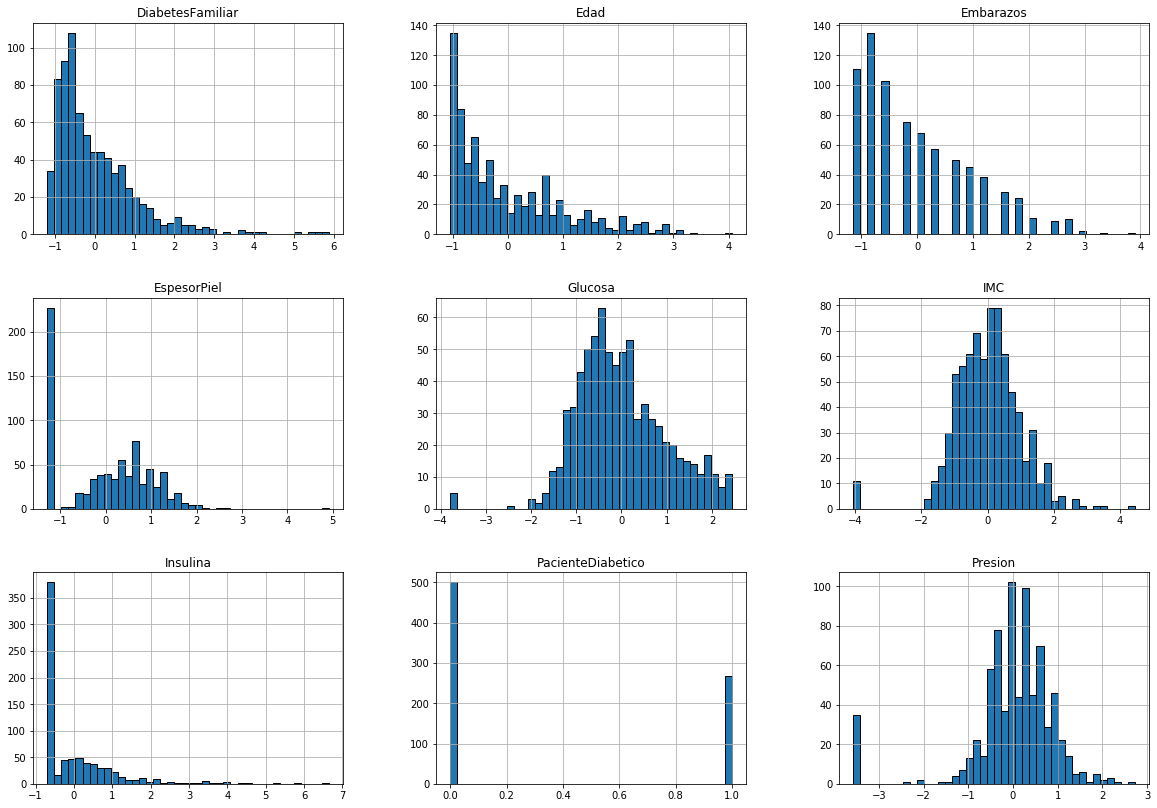


 Correlaciones:


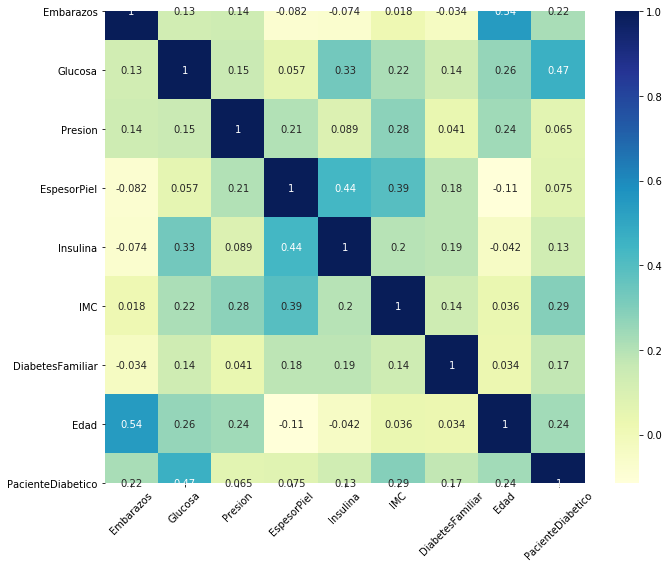

In [6]:
# Distribuciones de la data y Correlaciones
print("\n Histogramas:")
plotHistogram(dataset_final)

print("\n Correlaciones:")
plotCorrelations(dataset_final)

Dividiendo data en conjuntos de Entrenamiento y Prueba:


In [0]:
# Obteniendo valores a procesar
X = dataset_final.iloc[:, 0:8].values
y = dataset_final.iloc[:, 8].values

# Dividiendo el Dataset en sets de Training y Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

---
## PARTE II - CONSTRUYENDO LA RED NEURONAL ARTIFICIAL
---

In [8]:
# Importando Keras y Tensorflow
from keras.models import Sequential
from keras.layers import Dense
from keras.initializers import RandomUniform

# Inicializando la Red Neuronal
neural_network = Sequential()

# kernel_initializer Define la forma como se asignará los Pesos iniciales Wi
initial_weights = RandomUniform(minval = -0.5, maxval = 0.5)

# Agregado la Capa de entrada y la primera capa oculta
# 10 Neuronas en la capa de entrada y 8 Neuronas en la primera capa oculta
neural_network.add(Dense(units = 5, kernel_initializer = initial_weights, activation = 'relu', input_dim = 8))

# Agregando capa oculta
neural_network.add(Dense(units = 3, kernel_initializer = initial_weights, activation = 'relu'))

# Agregando capa de salida
neural_network.add(Dense(units = 1, kernel_initializer = initial_weights, activation = 'sigmoid'))

Using TensorFlow backend.


Arquitectura de la Red Neuronal Artificial:

In [9]:
# Imprimir Arquitectura de la Red
neural_network.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 5)                 45        
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 18        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 4         
Total params: 67
Trainable params: 67
Non-trainable params: 0
_________________________________________________________________


Entrenamiento:

In [10]:
# Compilando la Red Neuronal
# optimizer: Algoritmo de optimización | binary_crossentropy = 2 Classes
# loss: error
neural_network.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])


# Entrenamiento
neural_network.fit(X_train, y_train, batch_size = 32, epochs = 100)



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Epoch 1/100





614/614 [==============================] - 5s 8ms/step - loss: 0.6919 - acc: 0.6401
Epoch 2/100
614/614 [==============================] - 0s 146us/step - loss: 0.6881 - acc: 0.6401
Epoch 3/100
614/614 [==============================] - 0s 143us/step - loss: 0.6836 - acc: 0.6401
Epoch 4/100
614/614 [==============================] - 0s 156us/step - loss: 0.6765 - acc: 0.6401
Epoch 5/100
614/614 [==============================] - 0s 143us/step - loss: 0.6666 - acc: 0.6401
Epoch 6/100
614/614 [==============================] - 0s 143us/step - loss: 0.6537 - acc: 0.6401
Epoch 7/100
614/614 [==============================] - 0s 144us/step - loss: 0.6407 - acc: 0.6401
Epoch 8/100
614/614 [==============================] - 0s 158us/step - loss: 0.6276 - acc: 0.6401
Epoch 9/100
614/614 [==============================] - 0s 152us/step - loss: 0.6146 - acc: 0.6401
Epoch 10/100
614

---
## PARTE III - PREDICCIONES Y EVALUACIONES DE LA RED
---

In [0]:
# Haciendo predicción de los resultados del Test
y_pred = neural_network.predict(X_test)
y_pred_norm = (y_pred > 0.5)

y_pred_norm = y_pred_norm.astype(int)
y_test = y_test.astype(int)


Aplicando la Matriz de Confusión:

In [12]:
# Aplicando la Matriz de Confusión
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_norm)
print ("\nMatriz de Confusión: \n", cm)


Matriz de Confusión: 
 [[91 16]
 [16 31]]


Graficando la Matriz de Confusión:

Matriz de Confusión sin Normalizar
[[91 16]
 [16 31]]


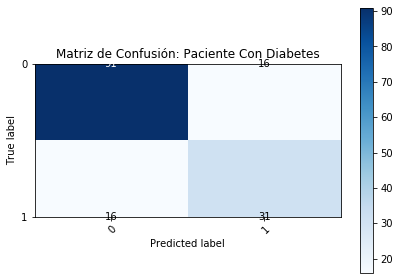

In [13]:
plot_confusion_matrix(y_test, y_pred_norm, normalize=False,title="Matriz de Confusión: Paciente Con Diabetes")

In [15]:
def saveModel(model, full_path, model_name_h5):
    # Guardar el modelo en disco: Model and Architecture to single file
    final_model_name = full_path + model_name_h5
    model.save(final_model_name)
    return final_model_name
    
base_path = ''
# Guardando StandardScaler a disco
saveFile(stdScaler,"".join([base_path,"model/stdScaler.save"]))

# Guardar la RNA en disco
model_file_name = saveModel(neural_network,"".join([base_path,"model/"]),"diabetes_model.h5")
print("Modelo guardado en disco >> ", model_file_name)


Modelo guardado en disco >>  model/diabetes_model.h5


In [20]:
from tensorflow import keras

model = keras.models.load_model('model/diabetes_model.h5')

keras.experimental.export_saved_model(model, 'modelo_diabetes/')


INFO:tensorflow:Signatures INCLUDED in export for Classify: None
INFO:tensorflow:Signatures INCLUDED in export for Regress: None
INFO:tensorflow:Signatures INCLUDED in export for Predict: None
INFO:tensorflow:Signatures INCLUDED in export for Train: ['train']
INFO:tensorflow:Signatures INCLUDED in export for Eval: None
INFO:tensorflow:No assets to save.
INFO:tensorflow:No assets to write.
INFO:tensorflow:Signatures INCLUDED in export for Classify: None
INFO:tensorflow:Signatures INCLUDED in export for Regress: None
INFO:tensorflow:Signatures INCLUDED in export for Predict: None
INFO:tensorflow:Signatures INCLUDED in export for Train: None
INFO:tensorflow:Signatures INCLUDED in export for Eval: ['eval']
INFO:tensorflow:No assets to save.
INFO:tensorflow:No assets to write.
INFO:tensorflow:Signatures INCLUDED in export for Classify: None
INFO:tensorflow:Signatures INCLUDED in export for Regress: None
INFO:tensorflow:Signatures INCLUDED in export for Predict: ['serving_default']
INFO:tens